In [11]:
import torch

Creating tensor

In [3]:
a = torch.tensor([7,6,5,4,3,2,1])
a.type()

'torch.LongTensor'

In [4]:
a.dtype

torch.int64

Converting Tensor

In [5]:
a = torch.FloatTensor([7,6,5,4])
a.dtype

torch.float32

In [6]:
a.type()

'torch.FloatTensor'

In [7]:
a = torch.tensor([7,6,5,4],dtype=torch.float)
a.dtype

torch.float32

In [8]:
a.type()

'torch.FloatTensor'

In [9]:
a = torch.tensor([7,5,4,3])
a = a.type(torch.float)
a.dtype

torch.float32

In [10]:
a.type()

'torch.FloatTensor'

Details about Tensor

In [13]:
a = torch.tensor([1,2,3,4,5])
a.dtype

torch.int64

In [14]:
a.type()

'torch.LongTensor'

In [16]:
a.size()

torch.Size([5])

In [17]:
a.ndimension()

1

In [22]:
a = a.view(-1,1)
a

tensor([[1],
        [2],
        [3],
        [4],
        [5]])

In [23]:
a.ndimension()

2

In [24]:
a.size()

torch.Size([5, 1])

Converting numpy array to tensor and tensor to numpy array

In [25]:
import numpy as np

In [26]:
np_array = np.array([1.0,2.1,2.3])
torch_tensor = torch.from_numpy(np_array)
torch_tensor

tensor([1.0000, 2.1000, 2.3000], dtype=torch.float64)

In [30]:
back_to_numpy = torch_tensor.numpy()
back_to_numpy

array([1. , 2.1, 2.3])

Pandas Series to tensor

In [31]:
import pandas as pd

In [32]:
pd_series = pd.Series([1,2,3,4])
pd_series

,0
0,1
1,2
2,3
3,4


In [33]:
torch_tensor = torch.from_numpy(pd_series.values)
torch_tensor

tensor([1, 2, 3, 4])

tensor to list

In [34]:
torch_tensor = torch.tensor([1,2,3])
torch_tensor

tensor([1, 2, 3])

In [35]:
l = torch_tensor.tolist()
l

[1, 2, 3]

Accessing individual values

In [36]:
a = torch.tensor([1,2,3])
a[2]

tensor(3)

In [37]:
a[2].item()

3

In [38]:
b = a[1:3]
b

tensor([2, 3])

In [39]:
a[1:3] = torch.tensor([100,200])
a

tensor([  1, 100, 200])

In [40]:
b

tensor([100, 200])

Basic operations

In [42]:
u = torch.tensor([1,2])
u

tensor([1, 2])

In [43]:
v = torch.tensor([3,4])
v

tensor([3, 4])

In [44]:
z = u + v
z

tensor([4, 6])

In [45]:
z = 2 * z
z

tensor([ 8, 12])

In [46]:
z = u * v
z

tensor([3, 8])

In [47]:
z = torch.dot(u,v)
z

tensor(11)

Universal Functions

In [52]:
a = torch.tensor([1.0,2.0,3.0])
a

tensor([1., 2., 3.])

In [53]:
a_mean = a.mean()
a_mean

tensor(2.)

In [54]:
a = a.type(torch.LongTensor)
a

tensor([1, 2, 3])

In [55]:
a.max()

tensor(3)

In [57]:
a =  a.type(torch.FloatTensor)
a

tensor([1., 2., 3.])

In [58]:
a.std()

tensor(1.)

In [59]:
a = torch.tensor([0,np.pi/2,np.pi])
a

tensor([0.0000, 1.5708, 3.1416])

In [60]:
b = torch.sin(a)
b

tensor([ 0.0000e+00,  1.0000e+00, -8.7423e-08])

In [61]:
a = torch.linspace(0, np.pi/2,steps = 5)
a

tensor([0.0000, 0.3927, 0.7854, 1.1781, 1.5708])

In [62]:
b = torch.sin(a)
b

tensor([0.0000, 0.3827, 0.7071, 0.9239, 1.0000])

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

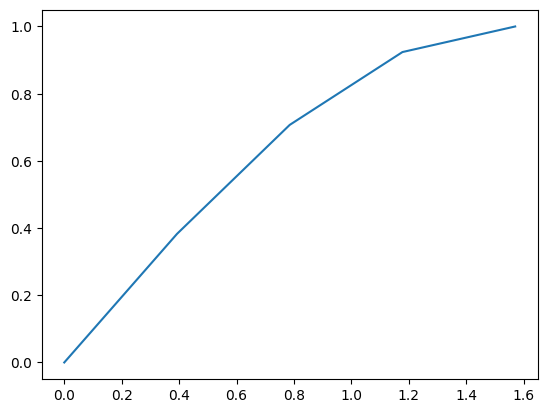

In [66]:
plt.plot(a.numpy(),b.numpy())

2-D tensors

In [72]:
a = torch.tensor([[1,2,3],[4,5,6]])
a

tensor([[1, 2, 3],
        [4, 5, 6]])

In [73]:
a.size()

torch.Size([2, 3])

In [74]:
a.ndimension()

2

In [75]:
a.numel()

6

In [76]:
a.shape

torch.Size([2, 3])

In [78]:
b = torch.tensor([[2,3,4],[5,6,7]])
b

tensor([[2, 3, 4],
        [5, 6, 7]])

In [79]:
c = a + b
c

tensor([[ 3,  5,  7],
        [ 9, 11, 13]])

In [80]:
d = a * b
d

tensor([[ 2,  6, 12],
        [20, 30, 42]])

In [83]:
b = b.view(-1,2)
b

tensor([[2, 3],
        [4, 5],
        [6, 7]])

In [84]:
e = torch.mm(a,b)
e

tensor([[28, 34],
        [64, 79]])

Differentation in pytorch

In [111]:
x = torch.tensor(2.0,requires_grad=True)
x

tensor(2., requires_grad=True)

In [112]:
y = x**3
y

tensor(8., grad_fn=<PowBackward0>)

In [113]:
y.backward()

In [114]:
x.grad

tensor(12.)

Partial Differentiation

In [115]:
u = torch.tensor(2.0,requires_grad=True)
v = torch.tensor(2.0,requires_grad=True)
print(u)
print(v)

tensor(2., requires_grad=True)
tensor(2., requires_grad=True)


In [116]:
f = u * v + u**2
f

tensor(8., grad_fn=<AddBackward0>)

In [117]:
f.backward()

In [121]:
u.grad

tensor(6.)

In [122]:
v.grad

tensor(2.)

Simple Dataset

In [123]:
from torch.utils.data import Dataset

In [124]:
torch.manual_seed(1)

In [155]:
class toy_dataset(Dataset):
  def __init__(self,length=100,transform=None):
    self.x = 2*torch.ones(length,3)
    self.y = torch.ones(length,1)
    self.len = length
    self.transform = transform
  def __getitem__(self,index):
    sample = self.x[index],self.y[index]
    if self.transform:
      sample = self.transform(sample)
    return sample
  def __len__(self):
    return self.len


In [134]:
#create object to dataset
dataset = toy_dataset()
print(len(dataset))

100


In [139]:
for i in range(3):
  x,y = dataset[i]
  print(i,"x: ",x,"y: ",y.item())

0 x:  tensor([2., 2., 2.]) y:  1.0
1 x:  tensor([2., 2., 2.]) y:  1.0
2 x:  tensor([2., 2., 2.]) y:  1.0


Transforms

In [156]:
class add_mult(object):
  def __init__(self,a=1,b=1):
    self.a = a
    self.b = b
  def __call__(self,sample):
    x = sample[0]
    y = sample[1]
    x = x + self.a
    y = y * self.b
    sample = x,y
    return sample

In [147]:
a_m = add_mult()

In [148]:
dataset = toy_dataset(transfrom=a_m)


In [149]:
dataset[0]

(tensor([3., 3., 3.]), tensor([1.]))

Transforms Compose

In [151]:
from torchvision import transforms

In [157]:
class mult(object):
  def __init__(self,mul=100):
    self.mul = mul
  def __call__(self,sample):
    x = sample[0]
    y = sample[1]
    x = x * self.mul
    y = y * self.mul
    sample = x,y
    return sample

In [158]:
m = mult()

In [160]:
data_transfrom = transforms.Compose([a_m,m])

In [161]:
dataset_1 = toy_dataset(transform=data_transfrom)
dataset_1[0]

(tensor([300., 300., 300.]), tensor([100.]))